<a href="https://colab.research.google.com/github/tharushaRukshanRavindra/SDGP/blob/main/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#removing automatically created ipynb file else it will be in the classes.
!rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os
import PIL
from glob import glob
import pathlib
#Importing keras
from keras import layers, callbacks, utils, applications, optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

print("Packages imported succsefully")
print("tf version: " + tf. __version__)


In [ ]:
!pip install tflite-support

In [ ]:
#giving the path of the data set main data set ps-not to the sub directories
image_path = "/content/drive/MyDrive/MOCK_DATA/"
total_images = len(list(glob(image_path + "*" + "/*.jpg")))
print(total_images)

300


In [ ]:
#number of classes in the dataset
num_of_classes = len(list(glob(image_path + "*")))
print(num_of_classes)

5


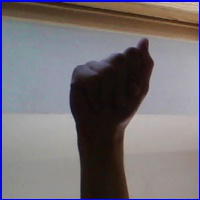

In [ ]:
a_path = "/content/drive/MyDrive/MOCK_DATA/A"
A = list(glob(a_path + "/*.jpg"))
PIL.Image.open(str(A[0]))

In [ ]:
image_size = 40
train_len = total_images
def get_data(folder):
    X = np.empty((train_len, image_size, image_size, 1), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int_)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
           
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 1))
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 1))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(image_path)
print("Images successfully imported...")

In [ ]:
#checking the shape of the array
print("The shape of arr : ", X_train.shape)
print("The shape of one image is : ", X_train[0].shape)


In [ ]:
print(y_train)

In [ ]:
X_train.shape

(300, 40, 40, 1)

In [ ]:
X_train.dtype
plt.imshow(X_train[60][:,:,0])
print(y_train[0])

In [ ]:
y_train.shape

(300,)

In [ ]:
#batch normalization converting all the values into a number betwween 0 and 1


In [ ]:
print(X_train[0])

In [ ]:
X_data = X_train
y_data = y_train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,stratify=y_data)

In [ ]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_of_classes)
y_cat_test = to_categorical(y_test,num_of_classes)

In [ ]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)


(240, 40, 40, 1)
(240,)
(60, 40, 40, 1)
(60,)
(240, 5)
(60, 5)


In [ ]:
import gc
del X_data
del y_data
gc.collect()

5283

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(40, 40, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(num_of_classes, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 38, 38, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 17, 17, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=10,
          batch_size=10,
          verbose=2,
          validation_data=(X_test, y_cat_test))

Epoch 1/10
24/24 - 1s - loss: 1.4576 - accuracy: 0.5250 - val_loss: 1.0435 - val_accuracy: 0.7833 - 1s/epoch - 62ms/step
Epoch 2/10
24/24 - 1s - loss: 0.5231 - accuracy: 0.8292 - val_loss: 0.0919 - val_accuracy: 1.0000 - 1s/epoch - 44ms/step
Epoch 3/10
24/24 - 1s - loss: 0.0532 - accuracy: 0.9917 - val_loss: 0.0125 - val_accuracy: 1.0000 - 1s/epoch - 53ms/step
Epoch 4/10
24/24 - 2s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 2s/epoch - 78ms/step
Epoch 5/10
24/24 - 1s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000 - 1s/epoch - 58ms/step
Epoch 6/10
24/24 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 7/10
24/24 - 1s - loss: 9.3404e-04 - accuracy: 1.0000 - val_loss: 8.6838e-04 - val_accuracy: 1.0000 - 1s/epoch - 44ms/step
Epoch 8/10
24/24 - 1s - loss: 6.9469e-04 - accuracy: 1.0000 - val_loss: 7.1167e-04 - val_accuracy: 1.0000 - 1s/epoch - 49ms/step
Epoch 9/10
24/24

#### 5.4 Model fitting <a id=15></a>

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  1.457604  0.525000  1.043496      0.783333
1  0.523110  0.829167  0.091870      1.000000
2  0.053219  0.991667  0.012504      1.000000
3  0.005890  1.000000  0.003363      1.000000
4  0.002349  1.000000  0.002148      1.000000
5  0.001437  1.000000  0.001176      1.000000
6  0.000934  1.000000  0.000868      1.000000
7  0.000695  1.000000  0.000712      1.000000
8  0.000568  1.000000  0.000595      1.000000
9  0.000468  1.000000  0.000481      1.000000

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.05701446533203125, 0.9833333492279053]

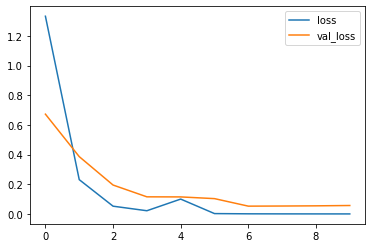

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

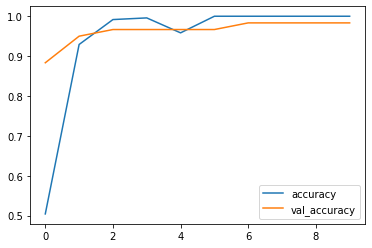

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
predictions = model.predict(X_test)
print("Predictions done...")

Predictions done...


In [ ]:
model.save('/content/modelWeights.h5') 

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)